# Testes com Rede Neural

Load

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

def plot_history(h):
    loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Custo não está presente no histórico')
        return
    epochs = range(1, len(h.history[loss_list[0]]) + 1)
    print(epochs)
    # Custo
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Custo [treinamento] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Custo [validação] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    plt.title('Custo')
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    plt.legend()
    # Acurácia
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Acurácia [treinamento] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Acurácia [validação] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.show()

# protocol = ['Flexão de punho', 'Extensão de punho', 'Pinça', 'Segurar cartão', 'Segurar caneta', 'Segurar esfera', 'Segurar copo', 'Gancho']
protocol = [0,1,2,3,4,5,6,7]

voluntarios = dict()
for v in range(10):
    voluntarios[v] = np.load(f'./datasets/topicosCC-processed/vol{v}-selected.npy')

### Rede Neural

Epoch 1/50
18/18 [==============================] - 1s 11ms/step - loss: 2.0055 - accuracy: 0.2022 - val_loss: 1.9089 - val_accuracy: 0.2521
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 1.8147 - accuracy: 0.3051 - val_loss: 1.7799 - val_accuracy: 0.3235
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 1.6822 - accuracy: 0.3574 - val_loss: 1.6834 - val_accuracy: 0.3739
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 1.5738 - accuracy: 0.4296 - val_loss: 1.5964 - val_accuracy: 0.4328
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 1.4731 - accuracy: 0.4928 - val_loss: 1.5049 - val_accuracy: 0.4790
Epoch 6/50
18/18 [==============================] - 0s 3ms/step - loss: 1.3740 - accuracy: 0.5379 - val_loss: 1.4295 - val_accuracy: 0.5084
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 1.2936 - accuracy: 0.5542 - val_loss: 1.3650 - val_accuracy: 0.5294
Epoch 8/50
18/18 [=

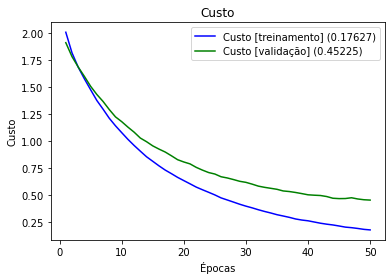

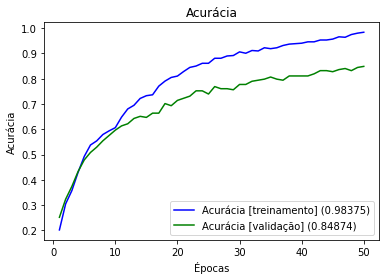

8/8 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.8487
Voluntario 5
Loss: 0.4522455930709839
Accuracy: 0.848739504814148


In [20]:
from sklearn.preprocessing import StandardScaler

def testRNA(v, epocas):
    #load
    x = StandardScaler().fit_transform(voluntarios[v])
    y = np.repeat(protocol, 99, axis=None)

    #divide
    y = to_categorical(y,  num_classes=len(protocol))
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    #create model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(8, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    #test
    history = model.fit(X_train, y_train, epochs=epocas, batch_size=32, validation_data=(X_test, y_test))
    plot_history(history)

    #result
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Voluntario {v}')
    print("Loss:", loss)
    print("Accuracy:", accuracy)
#end rna

testRNA(5, 50)

### Regularização e Dropout

#### L1 e L2:
Os regularizadores permitem que você aplique penalidades nos parâmetros da camada ou na atividade da camada durante a otimização. Essas penalidades são somadas na função de perda que a rede otimiza *(TensorFlow docs)*

Um modelo de regressão que usa a técnica de regularização L1 é chamado de Regressão Lasso e o modelo que usa L2 é chamado Regressão Ridge. 
A principal diferença entre esses dois é o termo de penalidade inserida na função de custo.

A regressão Ridge adiciona a “magnitude quadrada” do coeficiente como termo de penalidade à função de perda. Enquanto a regressão Lasso (Least Absolute Shrinkage and Selection Operator, em português, Mínimo Encolhimento Absoluto e Operador de Seleção) adiciona “valor absoluto de magnitude” do coeficiente como termo de penalidade para a função de perda. *(Anuja Nagpal/Medium)*

#### Dropout:
Quantidade de conexões entre nós de layers distintos que são removidos a cada época. Os nós são selecionados de forma aleatória.

Epoch 1/50
18/18 [==============================] - 1s 12ms/step - loss: 2.1017 - accuracy: 0.1841 - val_loss: 1.7738 - val_accuracy: 0.4244
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 1.7139 - accuracy: 0.3917 - val_loss: 1.4943 - val_accuracy: 0.5042
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 1.4298 - accuracy: 0.5072 - val_loss: 1.2267 - val_accuracy: 0.5588
Epoch 4/50
18/18 [==============================] - 0s 6ms/step - loss: 1.2273 - accuracy: 0.5487 - val_loss: 1.0356 - val_accuracy: 0.6429
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 1.0848 - accuracy: 0.6209 - val_loss: 0.9025 - val_accuracy: 0.7605
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.9343 - accuracy: 0.6769 - val_loss: 0.7819 - val_accuracy: 0.8067
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.8606 - accuracy: 0.6949 - val_loss: 0.6939 - val_accuracy: 0.8109
Epoch 8/50
18/18 [=

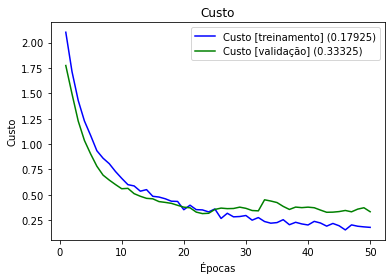

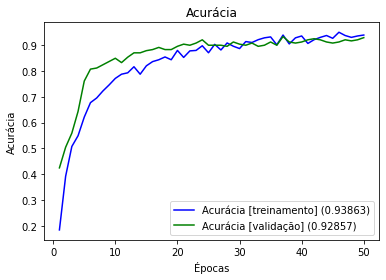

8/8 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.9286
Voluntario 6
Loss: 0.33324936032295227
Accuracy: 0.9285714030265808


In [57]:
from keras import regularizers, optimizers
from keras.layers import Dropout

def testRNA_Params(v, epocas, adam_lrate=0.001, l1l2=(0,0), dropout=(0,0)):
    #load
    x = StandardScaler().fit_transform(voluntarios[v])
    y = np.repeat(protocol, 99, axis=None)

    #divide
    y = to_categorical(y,  num_classes=len(protocol))
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    #l1l2
    regularizer = regularizers.L1L2(l1=l1l2[0], l2=l1l2[1])

    #create model
    model = Sequential()
    model.add(   Dense(64, activation='relu', input_shape=(X_train.shape[1],), ))# kernel_regularizer=regularizer ))
    if dropout[0] != 0: model.add(Dropout(dropout[0]))
    model.add(Dense(32, activation='relu'))#, kernel_regularizer=regularizer))
    if dropout[1] != 0: model.add(Dropout(dropout[1]))
    model.add(Dense(8, activation='softmax'))
    model.compile(optimizer=optimizers.Adam(learning_rate=adam_lrate), loss='categorical_crossentropy', metrics=['accuracy'])

    #test
    history = model.fit(X_train, y_train, epochs=epocas, batch_size=32, validation_data=(X_test, y_test))
    plot_history(history)

    #result
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Voluntario {v}')
    print("Loss:", loss)
    print("Accuracy:", accuracy)
#end rna


# testRNA_Params(5, 100, adam_lrate=0.001, l1l2=(0.01, 0.01), dropout=(0.1, 0.1))

testRNA_Params(v=6, epocas=50, adam_lrate=0.003, l1l2=(0.001, 0.001), dropout=(0.2, 0.2))

#### Explicação dos Hiper Parametros

Adam LearningRate em 0.003 mostrou-se melhorar em 2 pontos percentuais a acurácia em comparação aos valores de 0.01 e 0.001.

L1 e L2 não mostraram melhorar a acurácia, mas seus valores em (0.001, 0.001) ajudaram a remover os picos do custo, que ajudam a reduzir a aleatoriedade dos dados, e por consequência deixar sua acurácia mais estável a cada vez que o algoritmo é executado.

Dropout em (0.2, 0.2) mostrou-se diminuir a taxa de acerto do conjunto de teste (overfitting) de 100% em 50 épocas para 93% 